# CSE-221710304011-B.ALEKYA

# Prediction of Heart Disease¶Occurence

### In this machine learning project, I have collected the dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) and I will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not.

## Import libraries

### Let's first import all the necessary libraries. I'll use numpy and pandas to start with. For visualization, I will use pyplot subpackage of matplotlib, use rcParams to add styling to the plots and rainbow for colors. For implementing Machine Learning models and processing of data, I will use the sklearn library.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## For processing the data, I'll import a few libraries. To split the available dataset for testing and training, I'll use the train_test_split method. To scale the features, I am using StandardScaler.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Next, I'll import all the Machine Learning algorithms I will be using.

###   1. Logistic Regression
###   2. K Neighbors Classifier
###   3. Naive bayes 

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

## Import dataset

In [6]:
dataset = pd.read_csv("heart.csv")
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### The dataset is now loaded into the variable dataset. I'll just take a glimpse of the data using the desribe() and info() methods before I actually start processing and visualizing it.

In [7]:
dataset.info

<bound method DataFrame.info of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2

### Looks like the dataset has a total of 1025 rows and there are no missing values. There are a total of 13 features along with one target value which we wish to find.

In [8]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### The scale of each feature column is different and quite varied as well. While the maximum for age reaches 77, the maximum of chol (serum cholestoral) is 564.

## Exploratory Data Analysis (EDA)

### Statistical Analysis


In [9]:
# checking the data type of any column
dataset.age.dtype

dtype('int64')

In [10]:
type(dataset.age[0])

numpy.int64

In [11]:
dataset.columns.value_counts()

trestbps    1
ca          1
target      1
oldpeak     1
restecg     1
thal        1
thalach     1
cp          1
age         1
sex         1
chol        1
fbs         1
slope       1
exang       1
dtype: int64

In [12]:
#checking the occurances or frequency of values in a particular column
dataset['age'].value_counts() #mode

58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
63    32
41    32
67    31
61    31
55    30
65    27
43    26
53    26
42    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
70    14
39    14
38    12
68    12
40    11
71    11
69     9
34     6
37     6
29     4
76     3
74     3
77     3
Name: age, dtype: int64

In [13]:
#checking for duplicated values
dataset[dataset.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [14]:
#checking for duplicated values in a particular column
dataset[dataset['age'].duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
14,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
17,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


1    526
0    499
Name: target, dtype: int64


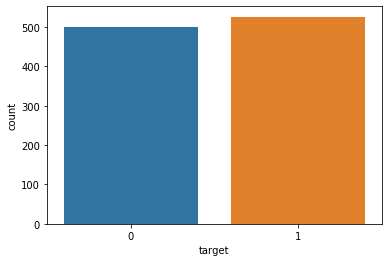

In [15]:
import seaborn as sns

y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

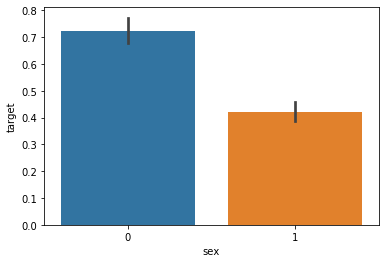

In [16]:
sns.barplot(dataset["sex"],dataset["target"])

## Heart disease frequency for ages

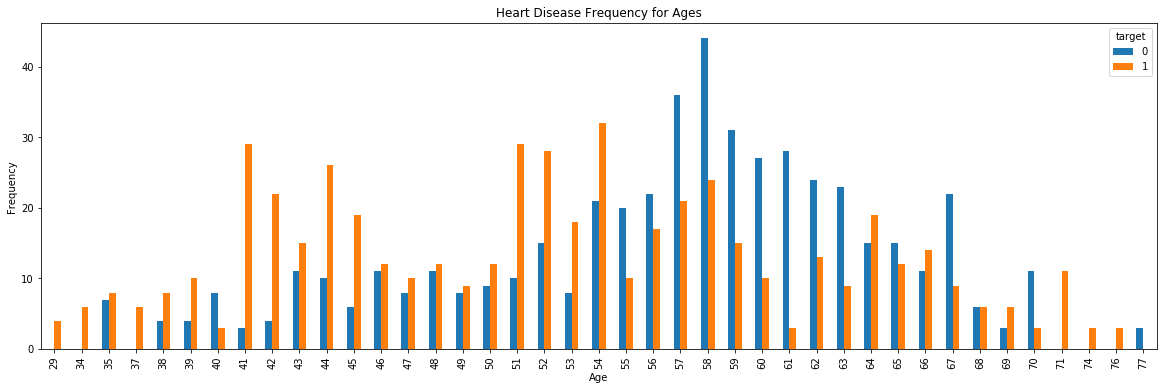

In [17]:
import matplotlib.pyplot as plt
pd.crosstab(dataset.age,dataset.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

## Heart Disease Frequency for male and female


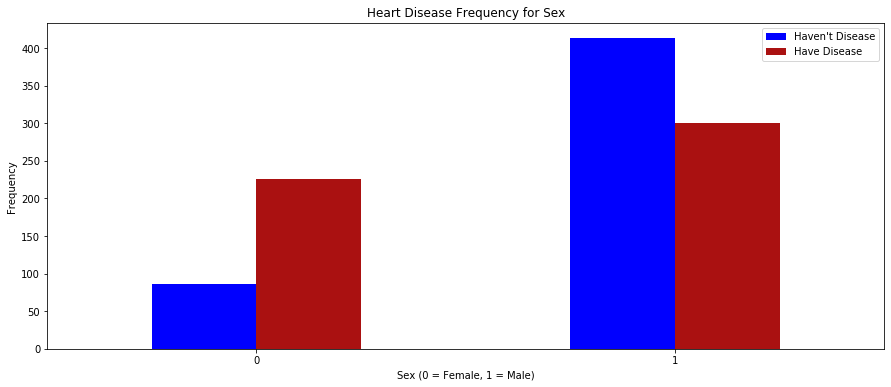

In [18]:
pd.crosstab(dataset.sex,dataset.target).plot(kind="bar",figsize=(15,6),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

## Visulization
Now, we can use visualizations to better understand our data

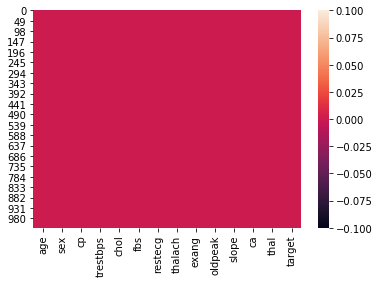

In [20]:
# Visualizing the missing values with heatmap
sns.heatmap(dataset.isna())

In [21]:
bg_color = (0.25, 0.25, 0.25)
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":False,
            'axes.labelsize':25,
            'figure.figsize':(10.0,5.0),
            'xtick.labelsize':15,
            'ytick.labelsize':15})

## Correlation Matrix
###To begin with, let’s see the correlation matrix of features and try to analyse it. The figure size is defined to 12 x 8 by using rcParams. Then, I used pyplot to show the correlation matrix. Using xticks and yticks, I’ve added names to the correlation matrix. colorbar() shows the colorbar for the matrix.

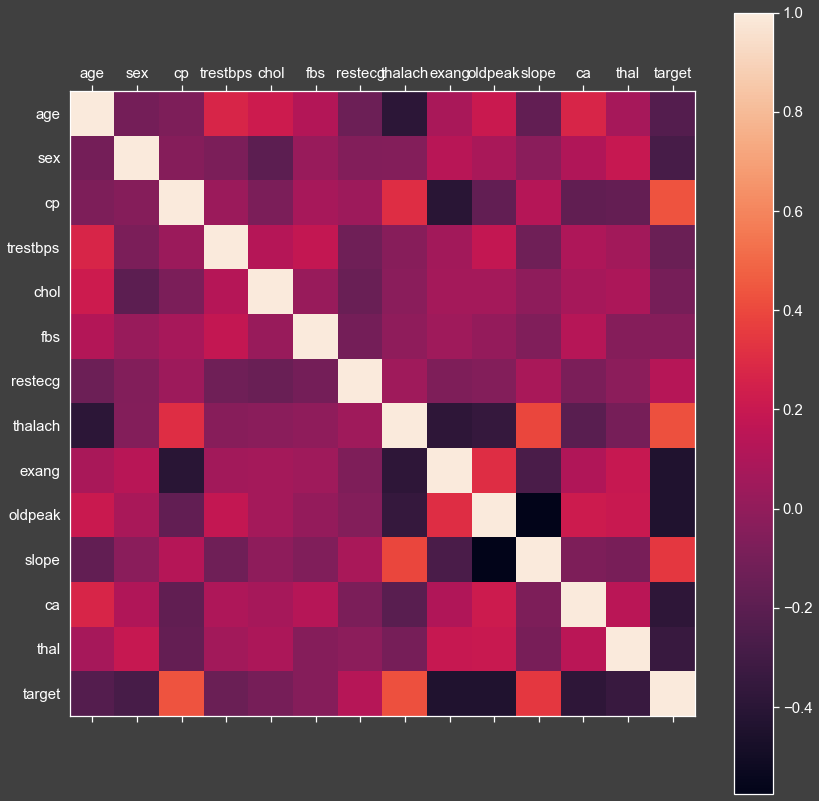

In [50]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

### It’s easy to see that there is no single feature that has a very high correlation with our target value. Also, some of the features have a negative correlation with the target value and some have positive.

## Histogram

### The best part about this type of plot is that it just takes a single command to draw the plots and it provides so much information in return. Just use

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F073AF5048>,
      dtype=object)

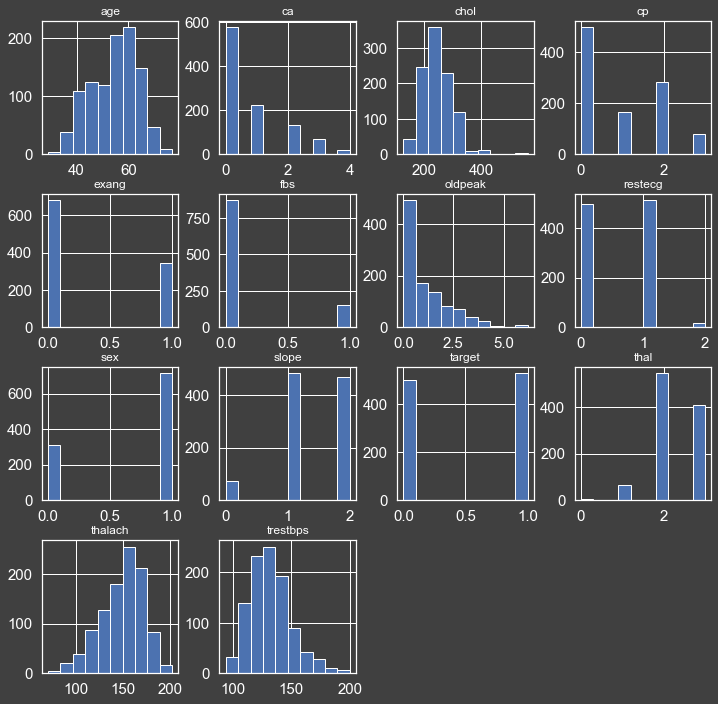

In [22]:
dataset.hist(figsize=(12,12))

### Let’s take a look at the plots. It shows how each feature and label is distributed along different ranges, which further confirms the need for scaling. Next, wherever you see discrete bars, it basically means that each of these is actually a categorical variable. We will need to handle these categorical variables before applying Machine Learning. Our target labels have two classes, 0 for no disease and 1 for disease.

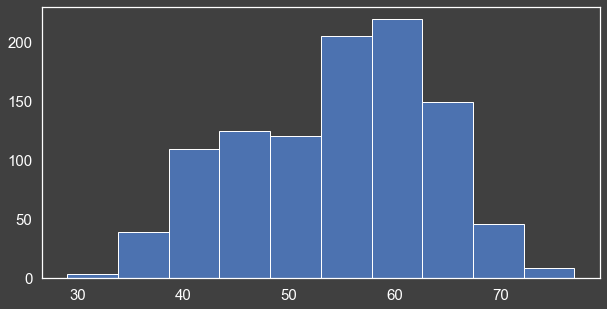

In [23]:
dataset['age'].hist(grid=False)

### Majority of people get heart attack around the age 55-60

## Machine Learning

### Split the dataset into input and output--> Train and test
### Train--> Building the model
### Test--> How well the model has learnt(Generaize on unseen data)


In [24]:
# Preparing Input and Output
# Drop the id and diagnosis columns
X = dataset.drop(['target'], axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [25]:
# Accessing Output Column
y = dataset.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [26]:
# Preparing Training and Testing Data
# Storing 70% of the data(569 rows) into training and remaining 30% of the data into testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=10)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train

(717, 13)
(308, 13)
(717,)
(308,)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
750,55,1,1,130,262,0,1,155,0,0.0,2,0,2
807,44,1,2,130,233,0,1,179,1,0.4,2,0,2
687,58,1,0,125,300,0,0,171,0,0.0,2,2,3
651,41,1,1,120,157,0,1,182,0,0.0,2,0,2
826,42,1,2,130,180,0,1,150,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,40,1,3,140,199,0,1,178,1,1.4,2,0,3
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2
369,51,1,2,110,175,0,1,123,0,0.6,2,0,2
320,53,0,0,130,264,0,0,143,0,0.4,1,0,2


In [28]:
# Build the classifier on training data
# Sklearn library: import, instantiate, fit
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()  # Creating object for Logistic Regression class
reg.fit(X_train, y_train) # Input and Output will be passed to the fit method

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# Predicting on train data  
# Syntax: objectName.predict(Input)
y_train_pred = reg.predict(X_train)
y_train_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,

In [30]:
y_train== y_train_pred # Comparing actual values and predicted values

750    True
807    True
687    True
651    True
826    True
       ... 
156    True
123    True
369    True
320    True
527    True
Name: target, Length: 717, dtype: bool

In [31]:
# Confusion matrix for training data
# Confusion matrix(Actual Values, Predicted values)
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_train, y_train_pred)
conf

array([[279,  67],
       [ 30, 341]], dtype=int64)

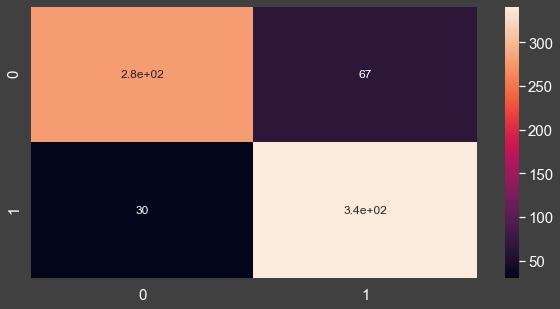

In [32]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True)

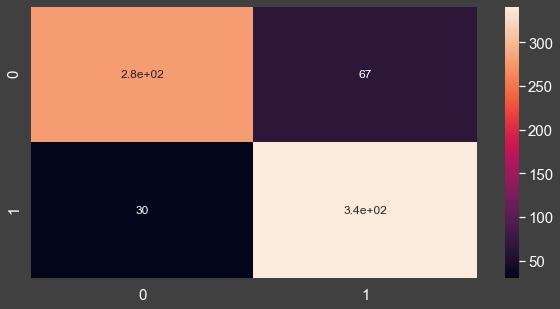

In [33]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True)

In [34]:
conf

array([[279,  67],
       [ 30, 341]], dtype=int64)

In [35]:
print('true_negative=', conf[0][0])
print('false_positive=', conf[0][1])
print('false_negative=', conf[1][0])
print('true_positive=',  conf[1][1])

true_negative= 279
false_positive= 67
false_negative= 30
true_positive= 341


In [36]:
## Accuracy--> TP+TN/TP+FP+TN+FN
## Correct Predictions/ Total Number of Predictions
(266+347)/(347+69+35+266)

0.8549511854951185

In [37]:
# Calculating Accuracy: Syntax:- ccuracy_score(actualValues, predictedValues)
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.8647140864714087

In [38]:
#prediction on Test data
# Syntax: objectName.predict(Input)
y_test_pred = reg.predict(X_test)
y_test_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [39]:
y_test== y_test_pred # Comparing actual values and predicted values

620     True
181     True
546     True
618     True
822     True
       ...  
964     True
242     True
757    False
157     True
999     True
Name: target, Length: 308, dtype: bool

In [40]:
# Confusion matrix for testing data
# Confusion matrix(Actual Values, Predicted values)
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_test, y_test_pred)

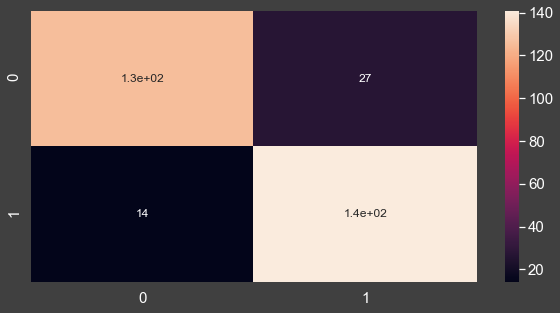

In [41]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)

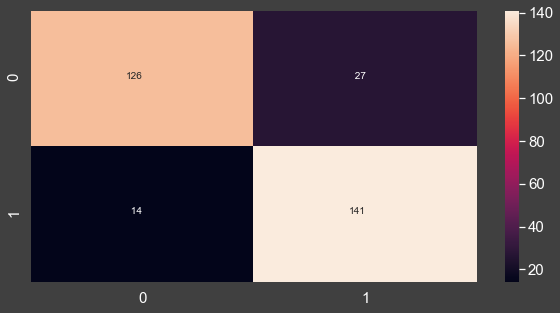

In [42]:
# supported values for ha are : 'center', 'right', 'left'
# supported values for va are : 'top', 'bottom', 'center', 'baseline', 'center_baseline
# fmt can also be given as d(integer formatting)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})

In [43]:
conf

array([[126,  27],
       [ 14, 141]], dtype=int64)

In [44]:
print('true_negative=', conf[0][0])
print('false_positive=', conf[0][1])
print('false_negative=', conf[1][0])
print('true_positive=',  conf[1][1])

true_negative= 126
false_positive= 27
false_negative= 14
true_positive= 141


In [45]:
## Accuracy--> TP+TN/TP+FP+TN+FN
## Correct Predictions/ Total Number of Predictions
(125+135)/(125+39+9+135)

0.8441558441558441

In [46]:
# Calculating Accuracy: Syntax:- ccuracy_score(actualValues, predictedValues)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.8668831168831169

In [49]:
score_lr=accuracy_score(y_test,y_test_pred)
scores = [score_lr]
algorithms = ["Logistic Regression"]   

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 0.8668831168831169 %


# K Neighbors Classifier

### Before Splitting if you apply standardization--> you are considering whole you are including test data also into training data

In [51]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling for training data
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
scaled_X_train

#Scaling for test data
#Testing the data based on training data
scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
scaled_X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.274315,0.676252,-0.922581,1.149447,0.531841,-0.441588,0.879214,-2.642109,1.387995,0.120332,-0.610776,0.243072,1.106221
1,1.045625,0.676252,1.982940,-1.257175,-0.680257,-0.441588,-1.002566,-0.209837,1.387995,0.627351,-0.610776,-0.725166,-0.509177
2,1.706747,0.676252,-0.922581,-0.111165,1.455343,-0.441588,-1.002566,-1.730007,-0.720464,1.134370,-0.610776,2.179549,-0.509177
3,-0.607181,0.676252,0.045926,-0.111165,0.377923,-0.441588,0.879214,0.962865,-0.720464,-0.386687,1.005188,-0.725166,-0.509177
4,0.604876,0.676252,-0.922581,-0.111165,0.127808,-0.441588,0.879214,-0.209837,1.387995,0.289338,1.005188,0.243072,1.106221
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,-1.158117,-1.478738,1.014433,-1.371776,-2.027032,-0.441588,0.879214,1.136599,-0.720464,-0.386687,-0.610776,-0.725166,-0.509177
304,-1.819239,0.676252,1.014433,0.347240,-1.372884,-0.441588,0.879214,1.049732,-0.720464,-0.893707,1.005188,3.147788,-0.509177
305,1.265999,0.676252,-0.922581,1.607851,-0.353183,-0.441588,-1.002566,-0.470438,-0.720464,1.049866,1.005188,-0.725166,-2.124575
306,-0.056246,0.676252,1.014433,-0.684170,0.224006,-0.441588,-1.002566,-0.079537,-0.720464,-0.555694,-0.610776,-0.725166,1.106221


In [52]:
# Model Building:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=40, metric='euclidean')

# Apply the knn object on the dataset(Training Phase)
# Syntax: objectName.fit(Input, Output)
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

In [53]:
# Predictions on the data
#predict function--> gives the predicted values
# Syntax:objectname.predict(Input)
y_train_pred = knn.predict(scaled_X_train)
y_train_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,

In [54]:
# Check the accuracy, classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82       346
           1       0.80      0.91      0.85       371

    accuracy                           0.84       717
   macro avg       0.84      0.83      0.83       717
weighted avg       0.84      0.84      0.83       717



In [56]:
from sklearn.metrics import accuracy_score
# Checking for optimum k-value
# Build the models with multiple k values
scores=[]
for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    pred_test = knn_model.predict(scaled_X_test)
    scores.append(accuracy_score(y_test, pred_test))
scores


[0.9512987012987013,
 0.9415584415584416,
 0.9058441558441559,
 0.8766233766233766,
 0.8701298701298701,
 0.8636363636363636,
 0.8474025974025974,
 0.8311688311688312,
 0.8571428571428571,
 0.8474025974025974,
 0.8603896103896104,
 0.8701298701298701,
 0.8733766233766234,
 0.8603896103896104,
 0.8603896103896104,
 0.8409090909090909,
 0.8376623376623377,
 0.8376623376623377,
 0.8246753246753247,
 0.814935064935065]

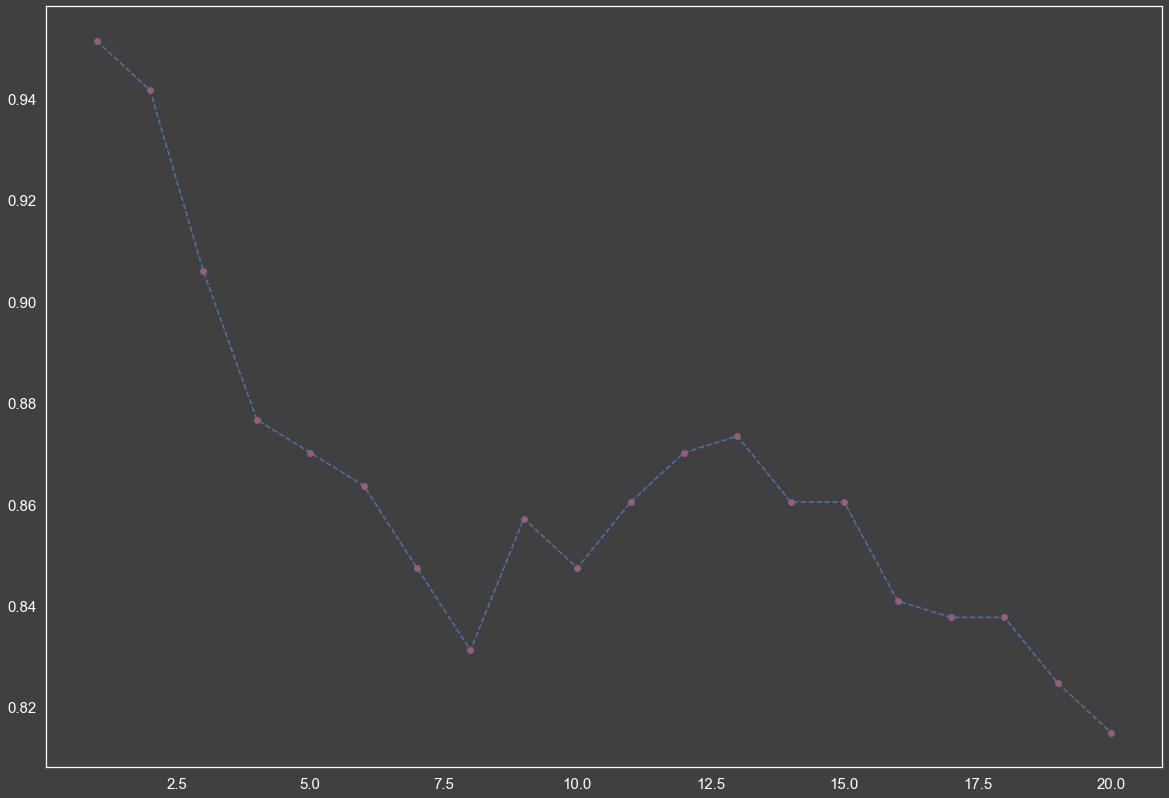

In [57]:
# Plot of K values and Scores
plt.plot(range(1,21), scores, marker='o', markerfacecolor='r', linestyle='--')

In [58]:
# Optimum k value is 1
final_model = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
final_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [59]:
# Prediction on  training data
final_train_pred = final_model.predict(scaled_X_train)
final_train_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

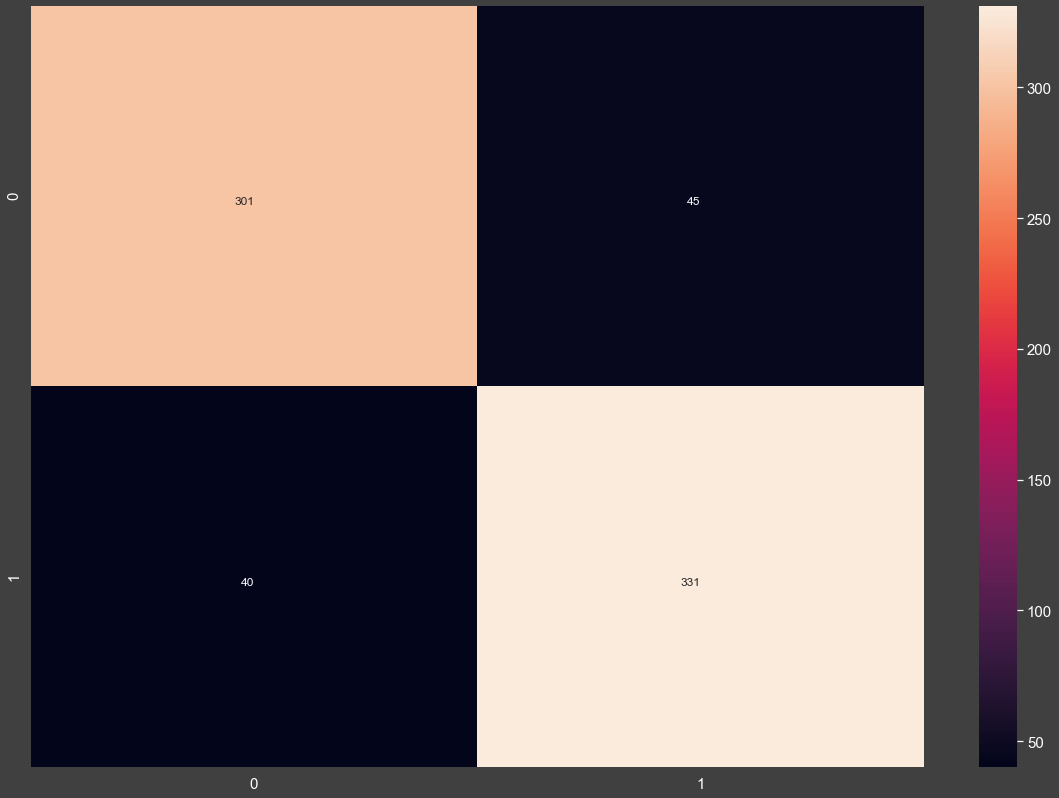

In [60]:
# Confusion Matrix of Training data
#Syntax: confusion_matrix(ActualValues, Predicted Values)
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train, final_train_pred), annot=True, 
            fmt='d', annot_kws={'va':'top','ha':'right'}) # d--> integer formatting

In [61]:
# Classification report for training Data
# Precision--> PPV--> Out of the positive predicted values, how many truely positive
print(classification_report(y_train, final_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       346
           1       0.88      0.89      0.89       371

    accuracy                           0.88       717
   macro avg       0.88      0.88      0.88       717
weighted avg       0.88      0.88      0.88       717



In [62]:
# Predictions on Test Data
final_test_pred = final_model.predict(scaled_X_test)  # y_test
final_test_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,

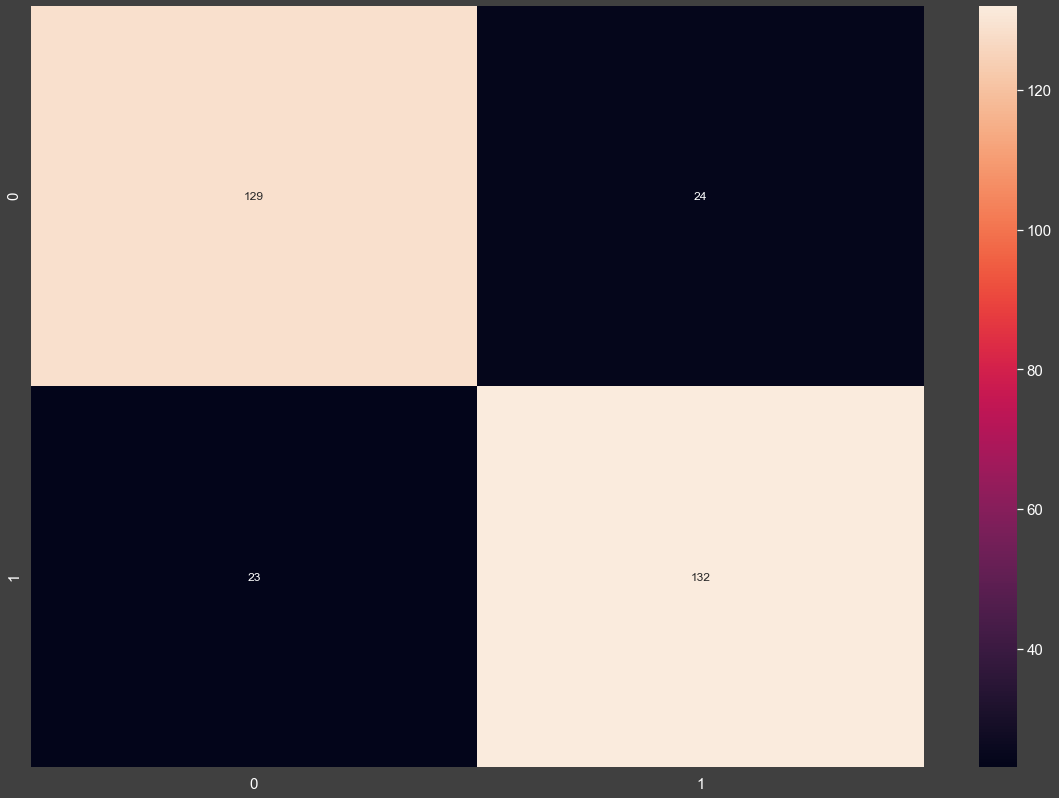

In [63]:
# Compare actual values of test data(y_test) and final_test_pred(model predicted values)
# Confusion_matrix(actualValues, predictedValues)
sns.heatmap(confusion_matrix(y_test, final_test_pred), annot=True, fmt='d')

In [64]:
# Classification Report for Test Data
print(classification_report(y_test, final_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       153
           1       0.85      0.85      0.85       155

    accuracy                           0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



In [66]:
#With Hyper Parameters Tuning
#2-4,kNearestNeighbors
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(scaled_X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 5], 'n_jobs': [-1],
                         'n_neighbors': [5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [67]:
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'distance'}


In [68]:
#Prediction
final_test_pred=model1.predict(scaled_X_test)

In [69]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(final_test_pred,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(final_test_pred,y_test))

Accuracy: 0.974025974025974
Confusion Metrix:
 [[149   4]
 [  4 151]]


In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.8354253835425384

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.8668831168831169

In [72]:
score_knn=accuracy_score(y_test,y_test_pred)
scores = [score_knn]
algorithms = ["K-Nearest Neighbors"]   

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using K-Nearest Neighbors is: 0.8668831168831169 %


In [ ]:
## Naive Bayes


In [73]:
# Apply the Naive Bayes Algorithm
#Import BernNB
from sklearn.naive_bayes import BernoulliNB

# creating an object for BerNB
nb = BernoulliNB()

In [74]:
# Applying the algorithm to the data
# ObjectName.fit(Input,Output)

nb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [75]:
y_train_pred = nb.predict(X_train)

In [76]:
# Compare the actual values(y_train) with predicted values(y_train_pred)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_train, y_train_pred)

array([[265,  81],
       [ 49, 322]], dtype=int64)

In [77]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       346
           1       0.80      0.87      0.83       371

    accuracy                           0.82       717
   macro avg       0.82      0.82      0.82       717
weighted avg       0.82      0.82      0.82       717



In [78]:
from sklearn.metrics import accuracy_score
nb_accuracy = accuracy_score(y_train,y_train_pred)

In [79]:
# Applying the Algorithm to the data
# ObjectName.fit(Input, Output)

nb.fit(X_test, y_test)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [80]:
# Prediction on Test Data
# Syntax: objectname.predict(InputValues)
y_test_pred = nb.predict(X_test)

In [81]:
# Compare the actual values(y_test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_test_pred)

array([[126,  27],
       [ 26, 129]], dtype=int64)

In [82]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       153
           1       0.83      0.83      0.83       155

    accuracy                           0.83       308
   macro avg       0.83      0.83      0.83       308
weighted avg       0.83      0.83      0.83       308



In [83]:
from sklearn.metrics import accuracy_score
nb_accuracy = accuracy_score(y_test,y_test_pred)

In [84]:
score_nb=accuracy_score(y_test,y_test_pred)
scores = [score_nb]
algorithms = ["Naive Bayes"]   

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Naive Bayes is: 0.827922077922078 %


# Final Score

In [85]:
scores = [score_lr,score_nb,score_knn]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors"]   

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 0.8668831168831169 %
The accuracy score achieved using Naive Bayes is: 0.827922077922078 %
The accuracy score achieved using K-Nearest Neighbors is: 0.8668831168831169 %


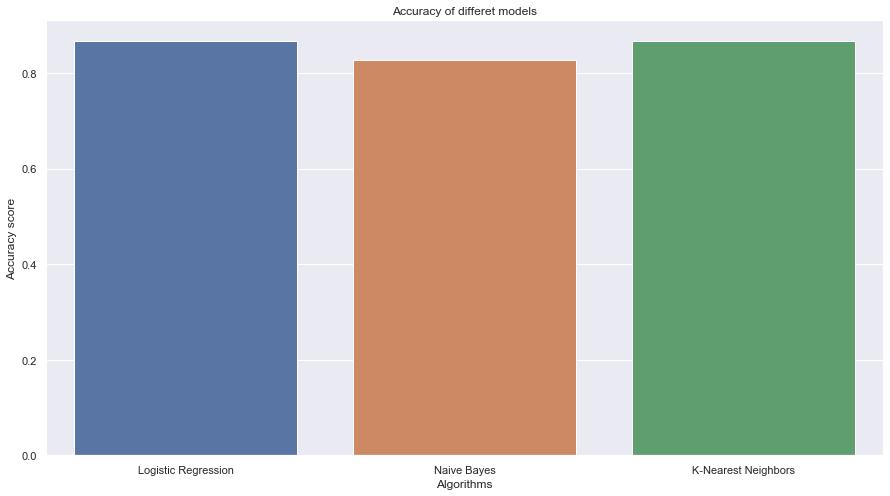

In [86]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.title("Accuracy of differet models")

sns.barplot(algorithms,scores)

#### we observe the the k-Nearest neighbours and logistic regression has the best accuracy.